![Wall-E](https://drive.google.com/uc?export=view&id=1CJsooGWXxTqWw0VeGAoroNb509nYKiRK)

Este notebook faz parte da aula [09](https://alunoweb.net/moodle/pluginfile.php/113365/mod_resource/content/2/Aula06_Probabilidade.pdf) do curso IAD-001.

# Modelos probabilísticos:
#Distribuições de probabilidade para variáveis contínuas

Lembrando que uma **distribuição de probabilidades**, ou **modelo probabilístico**, indica, para uma variável aleatória, **quais são os resultados que podem ocorrer** e **qual é a probabilidade de cada resultado acontecer**.

Na aula anterior vimo que uma função de massa de probabilidade (PMF, do inglês, *probability mass function*), $P(x)$, descreve a probabilidade de uma variável discreta obter $X$ o valor $x$. A variável $x$ assume $n$ valores discretos, de modo que,
\begin{align}
\sum_{x=x_1}^{x_n} P(x) = 1.
\end{align}

As distribuições de probabilidade de variáveis aleatórias contínuas, conhecidas como funções densidade de probabilidade (PDF em inglês, de probability density functions), são as funções que assumem valores contínuos. A probabilidade de observar qualquer valor único é igual a $0$, pois uma variável aleatória $x$ pode assumir qualquer valor ao longo de um intervalo de números reais. Portanto, o número de valores que podem ser assumidos pela variável aleatória é infinito.

Então, a probabilidade de $x$ estar no conjunto de resultados $A$, i.é, $P(A)$ é definida como a área que abrange o intervalo $A$ sob uma curva. A curva que representa uma função densidade de probabilidade $f(x)$, deve satisfazer o seguinte:

1.   não possui valores negativos ($f(x)>0$ para todos os valores admissíveis de $x$)
2.   a área total sob a curva é igual a 1.
$$\int_{-\infty}^{x} f(t) dt = 1 $$

## Função de distribuição cumulativa
Ainda, todas as variáveis aleatórias (discretas e contínuas) têm uma função de distribuição cumulativa. É uma função que fornece a probabilidade de que a variável aleatória $x$ seja menor ou igual a $x=a$, para cada valor $a$. Para uma variável aleatória discreta, a função de distribuição cumulativa é encontrada pela soma das probabilidades, para a variável contínua, esse valor é encontrado pela integral da função de $ - \infty$ até $a$.


Uma função de distribuição acumulativa (CDF, do inglês, *cumulative distribution function*), denominada $F(X)$, é definida como a probabilidade de que uma variável $X$ assuma valores menores ou iguais a $x$.
Vimos que, para uma distribuição discreta: $F(x) = \sum_{x_i=x_1}^x P(x_i)$
e para uma distribuiçõa contínua:
\begin{align}
F(x)=P(X \leqslant x)= \int_{-\infty}^{x} f(t) dt
\end{align}

Alguns exemplos de distribuições de probabilidade contínuas são distribuição Uniforme, Normal, Exponencial, Gama, etc... Vamos tratar de cada uma delas a seguir.

Vamos nos preocupar também em gerar variáveis pseudo randômicas para cada distribuição. Para explorar mais o assunto, sugere-se o site [random — Generate pseudo-random numbers](https://docs.python.org/2/library/random.html).

## Valor esperado e variância

O valor esperado de uma variável aleatória discreta pode ser obtido como  a integral da multiplicação de cada valor $x$ por sua densidade de probabilidades de ocorrência, definida como $f(x)$.

\begin{align}
E[X] = \mu_x = \int_{-\infty}^{\infty} x f(x) dx,
\end{align}

A variância e o desvio padrão são medidas de quanto os resultados probabilísticos se desviam do valor esperado, desta forma o valor esperado seria como o centro de massas do pdf e a varianza o momento de inércia ao respeito deste centro de massas.
Assumindo que o valor esperado $E[X]$ da variável foi calculado, a variância de uma variável aleatória $X$ é igual ao valor esperado do quadrado de $X$ menos o valor esperado de $X$ ao quadrado,
\begin{align}
\sigma_x^2 = \int_{-\infty}^{\infty} (x-\mu_x)^2 f(x) dx.
\end{align}

O desvio padrão de uma variável aleatória, $\sigma_x$ ou $s_x$, é a raiz quadrada da variância.

### Porque estamos falando de *valor esperado* e não média?

O Valor Esperado é usado no caso de Variáveis Aleatórias (ou em outras palavras, *Distribuições de Probabilidade*).

Sabe-se que a *média* é definida como a soma de todos os elementos dividida pela soma de suas frequências. Mas, para o caso da distribuição de probabilidade, não podemos descrever uma variável aleatória em termos de sua frequência de antemão, portanto, usamos a probabilidade. Conceitualmente, a probabilidade de um elemento é a frequência de um evento dividida pelo tamanho do espaço amostral. Assim, a média no caso de variável aleatória pode ser dada pela soma das multiplicações de cada evento pela respectiva probabilidade. Nesse caso, $P(x_i)*x_i$ é conceitualmente a frequência de $x_i$ dividida pela frequência total.

A média, por outro lado, é usada no caso em que temos o conhecimento das frequências dos elementos individuais e da contagem total dos elementos, por exemplo, no caso de um conjunto de dados ou amostra conhecido. Podemos simplesmente usar a definição fundamental de média para calculá-la.

Observe que temos, em geral,

\begin{equation}
\bar{X}=\frac{\sum_{k=1}^n x_k}{n}\neq E(X).
\end{equation}


Mas, a média dos experimentos tende ao valor esperado quando o número de experimentos tende ao infinito. Esse comportamento também é chamado de *lei dos grandes números*, mas isso não pe assunto para nós...

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random


# para plotagem
import seaborn as sns
# settings: seaborn plotting style
sns.set_style("darkgrid")
sns.set(color_codes=True)
# settings: seaborn plot sizes
sns.set(rc={'figure.figsize':(8,8)})
colors=['skyblue','darkblue','darkred','darkolivegreen','darkmagenta']

# para Latex
from IPython.display import Math, Latex


## Distribuição Uniforme
A função densidade de probabilidade (em inglês PDF, de probability density function)  de uma distribuição uniforme é dada por:

\begin{equation}
f(x)= \begin{cases} \begin{split}
&\frac{1}{b-a} \qquad &\text{se } a \leq x \leq b \\
&0   \qquad &\text{se } a \leq x \leq b \\
\end{split} \end{cases}
\end{equation}

sendo $x$ a variável aleatória.


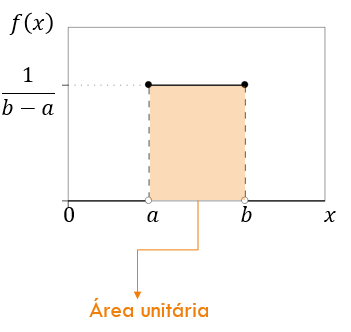

Modelo de Distribuição Uniforme


A característica dessa distribuição é que qualquer intervalo de números de largura igual tem uma probabilidade igual de ser observado.

A função

```
uniform.pdf(x,loc, scale)
```
gera o valor da função de distribuição $f(x)$. Veja que esse valor não é uma probabilidade. Dado que a variável é contínua uniforme entre o intervalo especificado por meio dos argumentos `loc` e `scale`, isto é, entre `loc` e `loc+scale`, então a probabilidade deve ser sempre dentro de um intervalo.
Porém, a função cumulativa

```
uniform.cdf(x,loc, scale)
```
gera a probabilidade da variável assumir valores até `loc+scale`.



In [ ]:
# importe distribuição uniforme
from scipy.stats import uniform

In [ ]:
a=4
print('f(x=a) vale: ', uniform.pdf(a, loc = 2, scale = 5))
print('P(x<a) vale: ',uniform.cdf(a, loc = 2, scale = 5))
intervalo = np.linspace(2,7,1000)
y=uniform.pdf(intervalo, loc = 2, scale = 5)
fig, ax = plt.subplots(1, 1)
#cuidado atualização seaborn: corrigir chamadas as funções
sns.lineplot(x=intervalo, y=uniform.pdf(intervalo, loc = 2, scale = 5), lw=5, alpha=0.6, label='Dist. Uniforme')


### Exercício sobre distribuição uniforme

Um jogo de azar é realizado da seguinte forma: um ponteiro é fixado no centro de um círculo. Girando o ponteiro, qual a probabilidade dele, quando parar, estar sinalizando um ângulo entre $30^o$ e $60^o$?


In [ ]:
#Tente resolver aqui

####Solução
Duplo-clique __aqui__ para a solução.

<!-- Resposta abaixo:
prob=uniform.cdf(60, loc = 0, scale = 360)-uniform.cdf(30, loc = 0, scale = 360)
print('A probabilidade do ponteiro estar entre 30 e 60 graus é: ','{:.2%}'.format(prob))  

A probabilidade do ponteiro estar entre 30 e 60 graus é:  8.33%
-->


A função uniforme `uniform.rvs(size, loc, scale)` gera valores pseudo aleatórios de uma distribuição uniforme. O argumento `size` descreve o número de variáveis aleatórias a serem geradas. Se você deseja manter a repetibilidade, inclua um argumento `random_state` atribuído a um número. Existe também a opção `np.random.uniform(low, high=None, size=None)`. Importante ressaltar que usando o default `high=None`, valores são são gerados entre `[0, low)`. Por exemplo,

`np.random(2, size=10)`

gera 10 valores aleatórios $0 \leq x <2$.

In [ ]:
print(np.random.uniform(2, size=10))

In [ ]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)
data_uniform2 = np.random.uniform(start, start+width, n)
print(data_uniform)
print(data_uniform2)

In [ ]:
# Create a histplot (histogram plot)
sns.histplot(data_uniform,
             bins=100,
             kde=False,  #kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable
             color='skyblue',
             line_kws={"linewidth": 1, "edgecolor": 'darkblue', "alpha": 0.5})


#ax.set(xlabel='Distribuição uniforme', ylabel='Frequencia')

# Set axis labels
plt.xlabel('Distribuição uniforme')
plt.ylabel('Frequência')

# Show the plot
plt.show()

### Exercício usando o modelo randômico para geração de variáveis inteiras
Com a função `np.random.randint(low, high=None, size=None)` você também gera valores, porém inteiros, entre o mínimo `low` e o máximo `high`(se definido). Se o default `high=None` é utilizado, valores são são gerados entre `[0, low)`. `np.random.randint(low, high=None, size=None)`eja que a distribuição é randômica e não uniforme. Por exemplo,

`np.random.randint(2, size=10)`

gera 10 valores aleatórios entre 0 e 1. Outro exemplo: a função

`np.random.randint(5,10, size=(3,2))`

gera e eventos, cada um com 2 tentativas, de variáveis entre 5 e 9.

Utilize a função, `np.random.randint` para gerar um evento de lançamento de dois dados 1000 vezes. Plote a soma dos dados em cada evento.

In [ ]:
#Veja inicialmente como funciona
print(np.random.randint(2, size=10))
print(np.random.randint(5,10, size=(3,2)))

In [ ]:
#Tente resolver aqui


####Solução

Duplo-clique __aqui__ para a solução.

<!-- Resposta

# Generação dos dados aleatórios
evento_dados = np.sum(np.random.randint(1, 7, size=(10000, 2)), axis=1)

# Crear o histograma
sns.histplot(evento_dados, bins=np.linspace(1, 13, 13) - 0.5, kde=True,
             color='skyblue', alpha=0.5, linewidth=1, edgecolor='darkblue')

# Set axis labels
plt.xlabel('Distribuição uniforme')
plt.ylabel('Frequência')

# Show the plot
plt.show()

#OU : ax.set(xlabel='Distribuição uniforme', ylabel='Frequencia')
-->

<font color='green'>
### Este é o seu exercício de Distribuição Uniforme</font>
<p style="font-family: Arial; font-size:1.4em">
<font color='green'>Se você recebe, em média, 90 acessos por hora em seu site, responda:

Use
1.   Qual é a probabilidade de se passarem 4 minutos sem nenhum acesso?
1.   Qual é a probabilidade de se esperar entre 1 e 2 minutos para o próximo acesso?
1.   Qual é a probabilidade de não se esperar mais que 2,5 minutos para o próximo acesso?
1.   Qual é a probabilidade de se esperar mais de 2 minutos por um acesso, dado que já passou 1 minuto sem acesso?
2.   Qual é a probabilidade de haver exatamente 3 acessos ao site no período de um minuto?
2.   Qual é a probabilidade de haver no máximo 3 acessos no site no período de um minuto?
2.   Qual é a probabilidade de haver exatamente 1 acesso no site em um período de 1 minuto e, no máximo, 3 acessos no próximo minuto?


</font> </p>

## Distribuição gaussiana ou normal

A distribuição normal, também conhecida como distribuição gaussiana, é onipresente na ciência de dados. Gauss fornece uma abordagem bastante conveninente para solucionar problemas de aprendizado de máquina supervisionados e não supervisionados.

Uma distribuição normal tem uma curva densidade de probabilidade em forma de sino, descrita por sua média $\mu$ e desvio padrão $\sigma$. A curva é simétrica, centrada em torno de sua média, variando de $ - \infty$ até $ + \infty$. Dados  próximos à média são mais frequentes na ocorrência do que os dados distantes da média e o nível dessa dispersão é definido pelo desvio padrão. Quase 68% dos dados estão a uma distância de $\pm \sigma$ e 95% em $\pm 2\sigma$, 99.7% em $\pm 3\sigma$, e assim por diante...

A função de distribuição de probabilidade de uma curva normal com média $\mu$ e desvio padrão $\sigma$ em um determinado ponto $x$ é dada por:

\begin{equation}
p(x)=\frac{1}{\sigma\sqrt(2\pi)}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
\end{equation}

Também vale mencionar que uma distribuição com média $0$ e desvio padrão $1$ é chamada distribuição normal padrão. O valor de $x$ normalizado é dado por:
\begin{equation}
z=\frac{x-\mu}{\sigma}
\end{equation}

Uma das maneiras de definir a função densidade d eprobabilidade em Python é
```
norm.pdf(x, loc=0, scale=1))
```
onde agora, `loc` especifica a média e `scale` especifica o desvio padrão. Novamente, essa função não define o valor da probabilidade. O valor é definido em intervalos. Uma maneira simples de encontrar a probabilidade de um intervalo é com a função que calcula a acumulada,


```
norm.cdf(x, loc=0, scale=1)
```



In [33]:
from scipy.stats import norm

In [ ]:
# Plot entre -5 e 5 com steps de .001
intervalo = np.arange(-5,5,0.001)
fig, ax = plt.subplots(1, 1)
sns.lineplot(x=intervalo, y=norm.pdf(intervalo),lw=5, alpha=0.6, label='Curva normal 01')
#mudando o desvio padrão de 1 para 2
sns.lineplot(x=intervalo, y=norm.pdf(intervalo, scale=2), lw=5, alpha=0.6, label='Curva normal 02')
#sns.lineplot(x=intervalo, y=ynorm, lw=5, alpha=0.6, label='Curva normal 02')

### Exercício com a variável padronizada $z$

Considerando a distribuição normal padronizada, calcule as seguintes probabilidades:

1.   $P\left( z \leq 2.62\right)=$
1.   $P\left( z \leq -1.45\right)=$
1.   $P\left( z > 1.45 \right)=$
2.   $P\left( -1.5 \leq z \leq 2.5\right)=$

Por último, calcule $s$ dado que,
5.   $P\left( z > s \right)= 0.0771$

Para o último item lembrem-se que `x=norm.ppf(0.99)` dá o valor de  `x`  para o qual a probabilidade acumulada é 99% de uma distribuição normal padronizada, ié, , `loc =0, scale = 1`.

In [ ]:
# Tente resolver aqui

####Solução
Duplo-clique __aqui__ para a solução e execute o código abaixo para visualizar as áreas.

<!-- Resposta
#Código:
#Item 1
prob = norm.cdf(2.62)
print('1. P(z<2.62)= ','{:.2%}'.format(prob))
#Item 2
prob = norm.cdf(-1.45)
print('2. P(z<-1.45)= ','{:.2%}'.format(prob))
#Item 3
#não precisaria fazer contas, como a curva é simétrica, P(z>1.45)=P(z<-1.45)
prob = 1.0 - norm.cdf(1.45)
print('3. P(z>1.45)= ','{:.2%}'.format(prob))
#Item 4
prob = norm.cdf(2.5)-norm.cdf(-1.5)
print('4. P(-1.5<z<2.5)= ','{:.2%}'.format(prob))
#Item 5
valor = norm.ppf(1.-0.0771)
print('5. s = ','{:03.2f}'.format(valor))

Que deve resultar:

1. P(z<2.62)=  99.56%
2. P(z<-1.45)=  7.35%
3. P(z>1.45)=  7.35%
4. P(-1.5<z<2.5)=  92.70%
5. s =  1.42
-->





In [ ]:
#Plot das curvas, para você visualizar as áreas
intervalo = np.arange(-4, 4, 0.001)
intervalo1 = np.arange(-4, 2.62, 0.001)
intervalo2 = np.arange(-4, -1.45, 0.001)
intervalo3 = np.arange(1.45, 4, 0.001)
intervalo4 = np.arange(-1.5, 2.5, 0.001)

#fig, ax = plt.subplots()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,5))

plt.style.use('fivethirtyeight')

#Item 01
sns.lineplot(x=intervalo, y=norm.pdf(intervalo), lw=5, alpha=0.6, label='Item 01', ax=ax1)
ax1.fill_between(intervalo1, norm.pdf(intervalo1), 0, alpha=0.3, color='b')

#Item 02
sns.lineplot(x=intervalo, y=norm.pdf(intervalo), lw=5, alpha=0.6, label='Item 02', ax=ax2)
ax2.fill_between(intervalo2, norm.pdf(intervalo2), 0, alpha=0.3, color='b')

#Item 03
sns.lineplot(x=intervalo, y=norm.pdf(intervalo), lw=5, alpha=0.6, label='Item 03', ax=ax3)
ax3.fill_between(intervalo3, norm.pdf(intervalo3), 0, alpha=0.3, color='b')

#Item 04
sns.lineplot(x=intervalo, y=norm.pdf(intervalo), lw=5, alpha=0.6, label='Item 04', ax=ax4)
ax4.fill_between(intervalo4, norm.pdf(intervalo4), 0, alpha=0.3, color='b')


### Exercício sobre distribuição de Gauss

Seleciona-se, aleatoriamente, de uma certa universidade, um estudante do sexo masculino e mede-se o valor de sua altura $x$, em $cm$. Admitindo-se que nesta universidade os estudantes têm altura média de $170 cm$ com desvio padrão de $10 cm$,

1.   plote a curva da função densidade de probabilidade normal para este problema.
1.   qual a probabilidade do estudante sorteado ter altura superior a $175 cm$?
2.   qual a probabilidade do estudante sorteado ter menos de $180 cm$?
1.   qual a probabilidade do estudante sorteado ter entre $155$ e $170 cm$?
2.   qual a altura mínima dos $5\%$ mais altos da universidade?

Dica: trabalhe com a soma e subtração das acumuladas. Para o último item lembrem-se que `x=norm.ppf(0.95, loc =0, scale = 1)` dá o valor de $x$ para o qual a probabilidade acumulada é 95%.

In [ ]:
# Tente resolver aqui

####Solução
Duplo-clique __aqui__ para a solução e execute o código abaixo para visualizar as áreas.

<!-- Resposta
#Código:
# Resposta
mu_altura = 160.0
sigma_altura = 10.0
lim_inf = mu_altura - 4.0*sigma_altura; lim_sup = mu_altura + 4.0*sigma_altura
intervalo = np.arange(lim_inf, lim_sup, 0.001)
fig, ax = plt.subplots(1, 1)
#Item 01
sns.lineplot(x=intervalo, y=norm.pdf(intervalo, loc=mu_altura, scale = sigma_altura),lw=5, alpha=0.6, label='Curva normal 01')
#Item 02
prob = 1.0 - norm.cdf(175, loc=mu_altura, scale = sigma_altura) #norm.sf(180, loc=mu_altura, scale = sigma_altura) dá o mesmo valor,ié, sf = 1-cdf
print('A probabilidade do estudante ter mais de 175cm é: ','{:.2%}'.format(prob))
#Item 03
prob=norm.cdf(180, loc=mu_altura, scale = sigma_altura)

print('A probabilidade estudante ter menos de 180 cm é: ','{:.2%}'.format(prob))
#Item 04
prob=norm.cdf(170, loc=mu_altura, scale = sigma_altura)-norm.cdf(155, loc=mu_altura, scale = sigma_altura)
print('A probabilidade estudante ter altura entre 170 e 155 cm é: ','{:.2%}'.format(prob))
#Item 04
altura=norm.ppf(0.95, loc=mu_altura, scale = sigma_altura)
print('A probabilidade estudante ter altura entre 170 e 155 cm é: ','{:03.2f}'.format(altura))

Que deve resultar:

A probabilidade do estudante ter mais de 175cm é:  6.68%
A probabilidade estudante ter menos de 180 cm é:  97.72%
A probabilidade estudante ter altura entre 170 e 155 cm é:  53.28%
A probabilidade estudante ter altura entre 170 e 155 cm é:  176.45
-->





###Exercício
Um dado nao viciado é lançado 1200 vezes. Seja $p$ a probabilidade de
a face 4 ocorrer entre 195 e 210 vezes inclusive. Então calcule:
1.  0 ≤ p < 0,20
2. 0,20 ≤ p < 0,40
3. 0,40 ≤ p < 0,60
4. 0,60 ≤ p < 0,80
5. 0,80 ≤ p ≤ 1
6. não sei

In [ ]:
n=1200
p=1./6.
mu_dado = n*p
sigma_dado = np.sqrt(n*p*(1.-p))
print(n,p,1-p,n*p*(1.-p), mu_dado,sigma_dado)
prob=norm.cdf(210, loc=mu_dado, scale = sigma_dado)-norm.cdf(195, loc=mu_dado, scale = sigma_dado)
print(prob)

In [ ]:
200*5/6
np.sqrt(200*1/6*5/6)
(195-200)/12.91
0.15173+0.27935

In [ ]:
0.20884+0.36433
600*5/36
np.sqrt(600*5/36)
5/6

<font color='green'>
###Este é o seu primeiro exercício de Distribuição Gaussiana</font>
<p style="font-family: Arial; font-size:1.4em">
<font color='green'>

Uma empresa produz televisores de 2 tipos, tipo A (comum) e tipo B (luxo), e garante a restituição da quantia paga se qualquer televisor apresentar defeito grave no prazo de seis meses.
O tempo para ocorrência de algum defeito grave nos televisores tem distribuição normal sendo que, no tipo A, com média de 10 meses e desvio padrão de 2 meses e no tipo B, com média de 11 meses e desvio padrão de 3 meses. Os televisores de tipo A e B são produzidos com lucro  de 1200 u.m. e 2100 u.m., respectivamente. Mas caso haja restituição, são produzidos com prejuízo de 2500 u.m. e 7000 u.m., respectivamente.
1. Calcule as probabilidades de haver restituição nos televisores do tipo A e do tipo B.
2. Calcule o lucro médio para os televisores do tipo A e para os televisores do tipo B.

Baseando-se nos lucros médios, a empresa deveria incentivar as vendas dos aparelhos do tipo A ou do tipo B?

</font> </p>

##Comentário


No código abaixo,
```
np.random.normal()
```
gera um número aleatório que é normalmente distribuído com uma média de $0$ e um desvio padrão de $1$.
Em seguida, multiplicamos por pelo desvio padrão para obter a volatilidade desejada e adicionamos a média para mudar a localização central.

Isto é,
*   Você pode mudar a média adicionando uma constante à sua variável aleatória distribuída normalmente (onde a constante é a média desejada). Ele altera a localização central da variável aleatória de 0 para qualquer número que você adicionou a ela.
*   Você pode modificar o desvio padrão da sua variável aleatória distribuída normalmente, multiplicando uma constante pela sua variável aleatória (onde a constante é o desvio padrão desejado).

In [ ]:
z = np.random.normal()
print('A variável padronizada z vale:', z)
mu_altura = 160.0
sigma_altura = 10.0
print('A variável aleatória x vale:', mu_altura + z *sigma_altura)


Você pode atribuir à função variável aleatória uma média e um desvio padrão,

```
numpy.random.normal(loc=media, scale=dsv padrao, size=None)
```

mas colocamos manualmente a média e o desvio padrão da sua variável aleatória no item anterior somente para dar a você a intuição da variável padronizada $z$, conforme estudamos na teoria.


In [ ]:
mu_altura = 160.0
sigma_altura = 10.0
z = np.random.normal(loc = mu_altura, scale = sigma_altura)
print('A variável padronizada z vale:', z)

A variável padronizada z vale: 153.35215579336483


In [ ]:
mu_altura = 160.0
sigma_altura = 10.0
target = mu_altura
dados_altura = np.random.normal(loc = mu_altura, scale = sigma_altura, size = 1000)
print('Altura média:', round(np.mean(dados_altura),1), 'cm')
print('Desvio Padrão da altura:', round(np.var(dados_altura)**0.5,1), 'cm')

# Histograma mostrando a distribuição dos dados
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(dados_altura, kde=False, label='Altura')
ax.set_xlabel("Alturas em cm",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16)
plt.axvline(target, color='red')
plt.axvline(round(np.mean(dados_altura),1), color='green')
plt.tight_layout()

### Exercício com valores randômicos de variáveis normais

Vamos, agora, *fabricar* alguns dados de altura. Para isso, suponha que serão feitas *10000 pesquisas* com 10 medições em pessoas diferentes em cada pesquisa.
1.   Crie a sua pesquisa, com média 160cm e desvio padrão 10cm;
1.   Calcule a média e o desvio padrão da pesquisa (deve ser muito similar ao valor definido no item anterior);
2.   Plote, em um gráfico, a distribuição das médias das pesquisas e em outro gráfico os 100000 valores obtidos;
1.   Comente os resultados.

In [ ]:
mu_altura = 160.0
sigma_altura = 10.0
dados_altura = np.random.normal(loc = mu_altura, scale = sigma_altura, size=(1000,10))
print('Altura média:', round(np.mean(dados_altura),1), 'cm')
print('Desvio Padrão da altura:', round(np.var(dados_altura)**0.5,1), 'cm')
#caso você ainda tenha dúvidas sobre a saída dados_altura, substitua o valor 10000
# por 20 e veja explicitamente a matriz de saída tirando o comentáriod a linha abaixo
#print(dados_altura)

# Histograma que mostra a distribuição para a média de todas as pesquisas
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(np.mean(dados_altura,axis=1), kde=False, label='Altura')
ax.set_xlabel("Alturas em cm",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16)
plt.axvline(target, color='red')
plt.axvline(round(np.mean(dados_altura),1), color='green')
plt.legend()
plt.tight_layout()

<font color='green'>
### Este é o seu exercício de Distribuição Normal</font>
<p style="font-family: Arial; font-size:1.4em">
<font color='green'>


Supondo que temos dois jogadores, Mário e Ana, e a habilidade habilidade de jogo de cada um deles é definida, respectivamente, por `MarSkill = 12.5` e `AnaSkill = 15`. Esses números parecem ser completamente arbitrários, e a escala na qual medimos a habilidade é de fato arbitrária. O que importa, no entanto, é como os valores das habilidades se comparam entre os jogadores. Atribuímos a Ana um maior valor de habilidade para indicar que ela é a jogadora mais forte. Mas agora nos deparamos com o primeiro de nossos desafios: o jogador mais forte em um jogo de videogame nem sempre é o vencedor. Se Ana e Fred jogassem muitos jogos um contra o outro, esperaríamos que Ana vencesse mais da metade deles, mas não necessariamente vencesse todos eles. Podemos capturar a variabilidade no resultado de um jogo, introduzindo a noção de desempenho para cada jogador, que expressa o quão bem eles jogaram em um jogo específico. O jogador com maior desempenho para um jogo específico será o vencedor desse jogo. Um jogador com um alto nível de habilidade tenderá a ter um alto desempenho, mas seu desempenho real variará de um jogo para outro.
Considere o desempenho de Ana como `AnaPerf` e o desempenho de Mario por `MarPerf`, com variância constante e igual para os dois jogadores, $\sigma^2=5^2$
\begin{equation}
p(AnaPerf;15,5^2)=\frac{1}{5\sqrt(2\pi)}e^{-\frac{1}{2}\left(\frac{x-15}{5}\right)^2} \\
p(MarPerf;12.5,5^2)=\frac{1}{5\sqrt(2\pi)}e^{-\frac{1}{2}\left(\frac{x-12.5}{5}\right)^2}
\end{equation}
Agora temos que definir o vencedor do jogo. Para isso, usareos uma variável binária `AnaVence`, que vale `True` se Ana for a vencedora e `False` se Mário for o vencedor. O valor dessa variável é determinado por qual das duas variáveis `AnaPerf` e `MarPerf` é maior - será `True` se `AnaPerf` for maior ou `False` caso contrário.

Dada a história acima, construa os seguintes gráficos:
1.   Construa as curvas de distribuição do desempenho de Ana e de Mário;
2.   Faça um gráfico desempenho de Ana versus desempenho de Mário e plote os valores obtidos em 1000 jogos. Coloque também uma linha dividindo a área em que a Ana da Área que o Mário vence
1.   Se repetirmos o processo de amostragem muitas vezes, como fizemos no item anterior (1000 vezes), a fração de vezes que `AnaVence` for `True` fornece, aproximadamente, a probabilidade de Ana ganhar um jogo. Calcule essa probabilidade aproximada.
2.   O que acontece com a probabilidade do item anterior se o desempenho da Ana ou do Mário ficarem instáveis? Obs. mude a variância e analise a resposta.

</font> </p>
<font color='green'>
Essa atividade é uma simplificação do texto que você encontra [aqui](http://mbmlbook.com/TrueSkill_Modelling_the_outcome_of_games.html).

O texto possui informações fora do escopo da nossa disciplina. Caso você queira ler o texto original, seja seletivo e não se preocupe em entender todos os detalhes.
</font> </p>



## Distribuição gaussiana multivariada

No centro de toda teoria está a distribuição gaussiana multivariada. É uma generalização multidimensional da distribuição normal unidimensional que acabamos de ver.

O método usa o fato de que quaisquer $n$-observações, $(x_1,…, x_n)$, em um conjunto de dados, são pontos amostrados de uma distribuição Gaussiana de $n$-variáveis.

Representa a distribuição de uma variável aleatória multivariada composta de várias variáveis aleatórias que podem ser correlacionadas entre si. A distribuição normal multivariável é dada por

\begin{equation}
p\left(\mathbf{x}; \mathbf{\mu}, \mathbf{\Sigma} \right)=\frac{1}{\left(2\pi \right)^{n/2} \left|\mathbf{\Sigma}\right|^{1/2}}  e^{-\frac{1}{2} \left(\mathbf{x} - \mathbf{\mu}\right)\mathbf{\Sigma}^{-1} \left(\mathbf{x} - \mathbf{\mu}\right)^T}
\end{equation}

$\mathbf{x}$ é um vetor de dimensão $n$
$\mathbf{\mu}$ vetor com as médias, $nx1$
$\mathbf{\Sigma}$ é a matriz de covariância, $n x n$ e $\left|\mathbf{\Sigma}\right|$ é o determinante de $\mathbf{\Sigma}$

Dessa forma, tem-se que $N \approx \left( \mathbf{\mu}, \mathbf{\Sigma}\right)$.

In [15]:
from __future__ import division
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

A função

```
multivariate_normal.pdf(x, mean, cov)
```

retorna a função $p\left( \mathbf{x};\mathbf{\mu},\mathbf{\sum}\right)$. As entradas são: vetor de médias `mean` $\mathbf{\mu}$ e matriz de covariância `cov` $\mathbf{\sum}$.

Pode-se também *congelar* a função, com média e variância fixa com a função

```
rv = multivariate_normal(mean, cov)
```
e o objeto pode ser chamado como função com os mesmos métodos, por exemplo,

```
rv.pdf(x)
```

A seguir, um exemplo. As informações foram resumidas do link [Scipy Multivariate Normal](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html)




In [3]:
from scipy.stats import multivariate_normal
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import cm

mu = np.array([0., 0.])
Sigma = np.array([[3., 2.], [1., 2.]])

N = 120
x1 = np.linspace(-3, 3, N)
x2 = np.linspace(-3, 3, N)
x1, x2 = np.meshgrid(x1, x2)


# Tire os comentários das linhas abaixo e veja os valores de x1 e x2 para entender
# o que cada combinação pos[a;b;0] e pos[a,b,1] significam
# Atenção: para visualizar melhor, caso não esteja conseguindo entender,
# diminua o número N=64 para 5
# print(x1)
# print(x2)

pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1
pos[:, :, 1] = x2

z = multivariate_normal(mu, Sigma)
z1, z2 = np.random.multivariate_normal(mu, Sigma, 3000).T

fig1, ax = plt.subplots(1, 1, figsize=(5, 5))
cp = ax.contourf(x1, x2, z.pdf(pos), cmap=cm.viridis)
fig1.colorbar(cp)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.axis('equal')
plt.show()

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z.pdf(pos), cmap=cm.viridis, antialiased=True)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('PDF Value')

plt.show()

## Distribuição Exponencial

A distribuição exponencial descreve o tempo entre os eventos em um processo de ponto de Poisson, isto é, um processo no qual os eventos ocorrem de forma contínua e independente a uma taxa média constante. Possui um parâmetro $\lambda$ chamado parâmetro de taxa e sua equação é descrita como:
\begin{equation}
p \left( x;\lambda \right)=\begin{cases}  
\begin{split}
&\lambda e^{-\lambda x} \qquad & \text{se } x \geq 0 \\
&0   \qquad                    & \text{se } x<0
\end{split}
\end{cases}
\end{equation}

A distribuição pode ser gerada através da função
```
expon.pdf(x,scale=beta,loc=0)
```
do módulo `scipy.stats`, que usa o parâmetro $\beta$ `scale`, que é $1/\lambda$ (ou a média) como argumento. Para deslocar a distribuição, use o argumento `loc`, `size` define o número de variáveis aleatórias na distribuição.

Lembre-se que as distribuições contínuas,
*   PDF: Probability Density Function, retorna a função de probabilidade de um determinado resultado contínuo.
*   CDF: Cumulative Distribution Function, retorna a probabilidade de um valor menor ou igual a um determinado resultado.
*   PPF: Percent-Point Function, retorna um valor que é menor ou igual à probabilidade fornecida.

In [11]:
from scipy.stats import expon
from scipy.stats import poisson

Veja, abaixo, a função densidade de probabilidade foi calculada de duas maneiras: usando explicitamente a sua definição,
```
data1 = lambd*np.exp(-lambd*x)
```
e usando a função expon.pdf,
```
data2 = expon.pdf(x,scale=beta)
```
Veja que na definiçaõ original usamos a taxa $\lambda$, enquanto que, para a função, o valor dado para scale foi $\beta = \frac{1}{\lambda}$.
Atenção, errar na definição correta do parâmetro da distribuição exponencial é bastante comum, e muitos exemplos na internet estão errados, por causa desta confusão.

In [ ]:
lambd = 0.5
beta = 1/lambd
x = np.arange(0,15,0.1)
data1 = lambd*np.exp(-lambd*x)
data2 = expon.pdf(x,scale=beta)
plt.plot(x,data1,'o', label = 'definição')
plt.plot(x,data2, label = 'função expon')
plt.legend()
plt.show()

### Exercício sobre exponencial
Em média, uma determinada peça do computador dura dez anos. O período de duração da peça do computador é distribuído exponencialmente.

1.   Desenhe a curva exponencial que modela o problema;
1.   Qual é a probabilidade de uma peça de computador durar mais de 7 anos?
2.   Quanto durará 80% das partes do computador?
1.   Qual é a probabilidade de uma peça de computador durar entre 9 e 11 anos?

In [ ]:
#Resposta
intervalo=np.linspace(0,50,100)
mu = 10
beta = mu
fig, ax = plt.subplots(1, 1)
#Item 01
sns.lineplot(x=intervalo, y=expon.pdf(intervalo,scale=beta,loc=0),lw=5, alpha=0.6, label='Curva exponencial, lambda = 50')
# Item 02 P(x>7)
prob = 1. - expon.cdf(7,scale=beta,loc=0)
print('A probabilidade de durar mais de 7 anos é: ','{:.2%}'.format(prob))
# Item 03 P(x<n)=80%
tempo = expon.ppf(0.80,scale=beta,loc=0)
print('80% dos componentes durarão (em anos): ','{:03.2f}'.format(tempo))
# Item 04 P(9<x<11)
prob = expon.cdf(11,scale=beta,loc=0)-expon.cdf(9,scale=beta,loc=0)
print('A probabilidade de durar entre 9 e 11 anos é: ','{:.2%}'.format(prob))

### Exercício para você resolver

Em um call center, as chamadas chegam a uma taxa média de quatro chamadas por minuto. Suponha que o tempo decorrido de uma chamada para a próxima tenha a distribuição exponencial.

1.   Encontre o tempo médio entre duas chamadas sucessivas.
2.   Encontre a probabilidade de que, após uma chamada ser recebida, a próxima chamada ocorra em menos de dez segundos.
1.  Encontre a probabilidade de que exatamente cinco chamadas ocorram em um minuto.
2.   Encontre a probabilidade de ocorrer menos de cinco chamadas em um minuto.
2.   Encontre a probabilidade de ocorrer mais de 40 chamadas em um período de oito minutos.


OBS.: Estamos preocupados apenas com a taxa em que as chamadas são recebidas e estamos ignorando o tempo gasto no telefone.

Também devemos assumir que o tempo gasto entre as chamadas é independente. Isso significa que um atraso particularmente longo entre duas chamadas não significa que haverá um período de espera mais curto para a próxima chamada. Podemos então deduzir que o número total de chamadas recebidas durante um período de tempo tenha a distribuição Poisson.

####Solução
Duplo-clique __aqui__ para a solução e execute o código abaixo para visualizar as áreas.

<!--
#Resposta
intervalo=np.linspace(0,50,100)
mu = 4. #chamadas por minuto
beta = 1./mu
#Item 01
print('O tempo médio entre duas chamadas sucessivas (em minutos): ','{:03.2f}'.format(beta))
# Item 02 P(x<10)
prob = expon.cdf(10/60,scale=beta,loc=0)
print('A probabilidade da próxima chamada ocorrer em menos de 10s é: ','{:.2%}'.format(prob))
# Item 03 P(x=5) - lembre-se que, para usar a distribuição de Poisson, você deve multiplicar lambda pelo número de períodos da análise
prob = poisson.pmf(5,mu*1.0)
print('A probabilidade de exatamente cinco chamadas ocorram em um minuto é: ','{:.2%}'.format(prob))
# Item 04 P(x<5)
prob = poisson.cdf(4,mu*1.0)
print('A probabilidade de que menos de cinco chamadas ocorram em um minuto é: ','{:.2%}'.format(prob))
# Item 05 P(x<5)
prob = 1. - poisson.cdf(40,mu*8.0)
print('A probabilidade de que mais de 40 chamadas ocorram em um minuto é: ','{:.2%}'.format(prob))


O tempo médio entre duas chamadas sucessivas (em minutos):  0.25
A probabilidade da próxima chamada ocorrer em menos de 10s é:  48.66%
A probabilidade de exatamente cinco chamadas ocorram em um minuto é:  15.63%
A probabilidade de que menos de cinco chamadas ocorram em um minuto é:  62.88%
A probabilidade de que mais de 40 chamadas ocorram em um minuto é:  7.07%
-->

### <font color='green'>
### Este é o seu exercício de Distribuição de Exponencial</font>
<p style="font-family: Arial; font-size:1.4em">
<font color='green'>Se você recebe, em média, 90 acessos por hora em seu site, responda:

1.   Qual é a probabilidade de se passarem 4 minutos sem nenhum acesso?
1.   Qual é a probabilidade de se esperar entre 1 e 2 minutos para o próximo acesso?
1.   Qual é a probabilidade de não se esperar mais que 2,5 minutos para o próximo acesso?
1.   Qual é a probabilidade de se esperar mais de 2 minutos por um acesso, dado que já passou 1 minuto sem acesso?
2.   Qual é a probabilidade de haver exatamente 3 acessos ao site no período de um minuto?
2.   Qual é a probabilidade de haver no máximo 3 acessos no site no período de um minuto?
2.   Qual é a probabilidade de haver exatamente 1 acesso no site em um período de 1 minuto e, no máximo, 3 acessos no próximo minuto?


</font> </p>






Você pode gerar uma variável aleatória distribuída exponencialmente usando o método
```
expon.rvs()
```
do módulo `scipy.stats`, que usa o parâmetro $\beta$ `scale`, que é $1/\lambda$ (ou a média) como argumento. Para deslocar a distribuição, use o argumento `loc`, `size` define o número de variáveis aleatórias na distribuição.


In [ ]:
data_expon = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data_expon, kde=False, bins=100, color='skyblue', hist_kws={"linewidth": .5,'alpha':0.8})
ax.set(xlabel='Distribuição exponencial', ylabel='Frequencia')

## Distribuição Gama
A distribuição exponencial prevê o tempo de espera até que o *primeiro* evento ocorra. A distribuição gama, por outro lado, prevê o tempo de espera até que o $k-$ésimo evento ocorra.

\begin{equation}
p(x)=\frac{\beta^{-\alpha} x^{\alpha-1} e^{-x/\beta}}{\Gamma(\alpha)}
\end{equation}

onde $\Gamma(\alpha)=(\alpha -1)!$

Para parametrização $\alpha,\beta$: Usando nossa notação $k$ como o número de eventos e $\lambda$ a taxa de eventos, basta substituir $\alpha$ por $k$, $\beta$ por $\lambda$.

In [ ]:
from scipy.stats import gamma

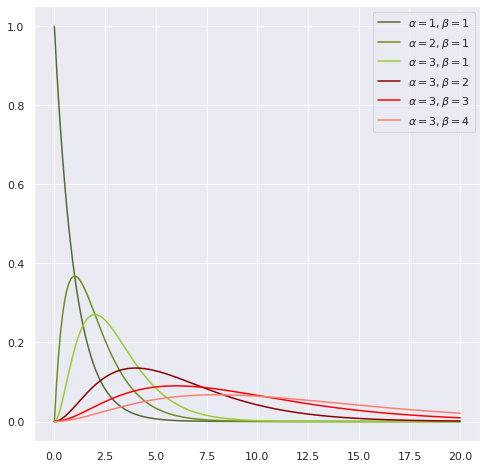

In [ ]:
x = np.linspace (0, 20, 200)
y1 = gamma.pdf(x, a=1, loc=0, scale =1 ) #a é alpha, scale é o valor de beta
plt.plot(x, y1, "y-", color = 'darkolivegreen', label=(r'$\alpha=1, \beta=1$'))
y1 = gamma.pdf(x, a=2, loc=0, scale =1)
plt.plot(x, y1, "y-", color = 'olivedrab',  label=(r'$\alpha=2, \beta=1$'))
y1 = gamma.pdf(x, a=3, loc=0, scale =1)
plt.plot(x, y1, "y-", color = 'yellowgreen',  label=(r'$\alpha=3, \beta=1$'))

y1 = gamma.pdf(x, a=3, loc=0, scale =2) #a é alpha, loc é o valor de beta
plt.plot(x, y1, "y-", color = 'darkred', label=(r'$\alpha=3, \beta=2$'))
y1 = gamma.pdf(x, a=3, loc=0, scale =3)
plt.plot(x, y1, "y-", color = 'red',  label=(r'$\alpha=3, \beta=3$'))
y1 = gamma.pdf(x, a=3, loc=0, scale =4)
plt.plot(x, y1, "y-", color = 'salmon',  label=(r'$\alpha=3, \beta=4$'))

plt.legend()
#plt.ylim([0,0.08])
#plt.xlim([0,150])
plt.show()

### Exercício sobre distribuição Gama

Suponha que o tempo em minutos que um estudante usa um terminal de computador no campus segue uma distribuição gama, com média $20 \text{ min}$ e variância $80 \text{ min}^2$. Pede-se,

1.   Quais os valores de $\alpha$ e $\beta$?
1.   Qual a probabilidade de um aluno usar por menos de 10min o computador?




In [ ]:
#Sua resposta


In [ ]:
#Gabarito:
#Item 1
#alpha*beta=20; alpha*beta^2=80
beta = 80/20
alpha = 20/beta
print('1. Os valores de alpha e beta são, espectivamente: ','{:03.2f}'.format(alpha), 'e','{:03.2f}'.format(beta))
#Item 2
prob = gamma.cdf(10, a=alpha, loc=0, scale=beta)
print('2. A probabilidade de um aluno usar por menos de 10min o computador é: ','{:.3%}'.format(prob))

In [ ]:
Pode-se gerar valores aleatórios que seguem uma distribuição gama, como fizemos com todos os outros modelos.

In [ ]:
data_gamma = gamma.rvs(a=5, size=10000)
ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 0.5,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

## Poisson vs Exponencial vs Gama
O tempo de chegada de carros na ponte Rio Niterói pode ser modelado pelo processo de Poisson com uma taxa de 30 carros por hora.

1.   Encontre a probabilidade de esperar mais de 10 minutos por 8 carros;
2.   Encontre a probabilidade de esperar até 10 minutos pelo primeiro carro;
1.   Encontre a probabilidade de chegarem 8 ou mais carros nos próximos 10 minutos.

In [ ]:
lambd= 30/60
beta = 1/lambd
#Item 1
alpha = 8
prob = 1. - gamma.cdf(10, a=alpha, loc=0, scale=beta)
print('1. A probabilidade de esperar mais de 10 minutos por 8 carros é: ','{:.2%}'.format(prob))
x = np.linspace (0, 30, 200)
x1 = np.linspace (10, 30, 200)
y1 = gamma.pdf(x, a=alpha, loc=0, scale=beta)
plt.plot(x, y1, "y-", color = 'darkolivegreen')
plt.fill_between(x1, gamma.pdf(x1, a=alpha, loc=0, scale=beta), 0, alpha=0.3, color='yellowgreen')
plt.title('Função densidade de probabilidade Gama')
plt.xlabel('tempo [min]')
plt.ylabel('p(x) ')
plt.show()

In [ ]:
lambd= 30/60
beta = 1/lambd
#Item 2
#Opção 01: calculando como Exponencial:
prob = expon.cdf(10, loc=0, scale=beta)
print('2. A probabilidade de esperar probabilidade de esperar até 10 minutos pelo primeiro carro é: ','{:.2%}'.format(prob))

#Opção 2: Gama com alpha = 1
alpha = 1
prob = gamma.cdf(10, a=alpha, loc=0, scale=beta)
print('2. A probabilidade de esperar probabilidade de esperar até 10 minutos pelo primeiro carro é: ','{:.2%}'.format(prob))

#Plot
x = np.linspace (0, 30, 200)
x1 = np.linspace (0, 10, 200)
y1 = gamma.pdf(x, a=alpha, loc=0, scale=beta)
plt.plot(x, y1, "y-", color = 'darkolivegreen')
plt.fill_between(x1, expon.pdf(x1,scale=beta), 0, alpha=0.3, color='yellowgreen')
plt.title('Função densidade de probabilidade Exponencial')
plt.xlabel('tempo [min]')
plt.ylabel('p(x) ')
plt.show()

In [ ]:
lambd= 30/60
beta = 1/lambd
#Item 3
#Poisson:
prob = 1. - poisson.cdf(8, lambd*10)
print('3. A probabilidade de chegarem 8 ou mais carros nos próximos 10 minutos é: ','{:.2%}'.format(prob))

#Plot
x = np.linspace (8, 30, 22, endpoint=False)
x1 = np.linspace (0, 8, 8, endpoint=False)
y1 = poisson.pmf(x, lambd*10)
plt.plot(x, y1, 'o', color = 'darkolivegreen')
plt.plot(x1, poisson.pmf(x1,lambd*10), 'o', color='yellowgreen')
plt.title('Função massa de probabilidade Poisson')
plt.xlabel('número de carros')
plt.ylabel('P(x) ')
plt.show()